In [4]:
import pandas as pd

In [81]:
train = pd.read_csv('./data/rossman_data/lspoons_train.csv')
test = pd.read_csv('./data/rossman_data/lspoons_test.csv')
store = pd.read_csv('./data/rossman_data/store.csv')

In [82]:
train.head()

,id,Store,Date,Sales,Promo,StateHoliday,SchoolHoliday
0,14929,85,2015-05-01,11360,1,a,0
1,14930,512,2015-05-01,10534,1,a,0
2,14931,1097,2015-05-01,17039,1,a,0
3,14932,1,2015-04-30,6228,1,0,0
4,14933,9,2015-04-30,9717,1,0,0


# 1. StateHoliday 변수 변환
### 피처 엔지니어링 활용

In [83]:
train['StateHoliday'].value_counts()
# StateHoliday 컬럼의 값이 0 a b c 4종류의 문자열로 이루어져 있음

0    62208
a       18
b       13
c        5
Name: StateHoliday, dtype: int64

In [84]:
train.head()
#  train 에는 4종류의 StateHoliday 가 모두 나옴

,id,Store,Date,Sales,Promo,StateHoliday,SchoolHoliday
0,14929,85,2015-05-01,11360,1,a,0
1,14930,512,2015-05-01,10534,1,a,0
2,14931,1097,2015-05-01,17039,1,a,0
3,14932,1,2015-04-30,6228,1,0,0
4,14933,9,2015-04-30,9717,1,0,0


In [85]:
# 원핫 인코딩도 피처 엔지니어링의 한 종류라 할 수 있다.
# 원핫 인코딩을 통해 StateHoliday 4가지 값을 컬럼으로 바꿔주자
train = pd.get_dummies(columns=['StateHoliday'], data=train)
test = pd.get_dummies(columns=['StateHoliday'], data=test)

In [86]:
test.head()
# test에는 StateHoliday 가 0과 a 뿐. b와 c는 아예 값이 없다는 뜻. 
# train데이터와 test데이터의 컬럼이 서로 다르면 학습과 예측 과정에서 문제가 생긴다.
# 때문에 test에 b 와 c 를 임의로 만들어줘야 한다.

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,0,1,2015-07-01,1,0,1,0
1,1,9,2015-07-01,1,1,1,0
2,2,11,2015-07-01,1,0,1,0
3,3,12,2015-07-01,1,0,1,0
4,4,14,2015-07-01,1,1,1,0


In [87]:
# test 데이터에 임의로 b와 c 컬럼을 만들어서 모두 0값을 부여한다.
test['StateHoliday_b'] = 0
test['StateHoliday_c'] = 0

In [88]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0,1,2015-07-01,1,0,1,0,0,0
1,1,9,2015-07-01,1,1,1,0,0,0
2,2,11,2015-07-01,1,0,1,0,0,0
3,3,12,2015-07-01,1,0,1,0,0,0
4,4,14,2015-07-01,1,1,1,0,0,0


# 2. Date 변수를 활용한 피처 엔지니어링

In [89]:
# 판다스의 datetime을 사용하면 해당 데이터를 날짜형태로 바꿔서 활용할 수 있다
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [90]:
# datetime 을 이용하면 연(year)/월(month)/요일(weekday) 계산 등이 쉬워진다!
train['Date'].dt.year.head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Date, dtype: int64

In [91]:
train['year'] = train['Date'].dt.year
test['year'] = test['Date'].dt.year

In [92]:
train['month'] = train['Date'].dt.month
test['month'] = test['Date'].dt.month

In [93]:
train['weekday'] = train['Date'].dt.weekday
test['weekday'] = test['Date'].dt.weekday

In [94]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,year,month,weekday
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,2015,5,4
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,2015,5,4
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,2015,5,4
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,2015,4,3
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,2015,4,3


# 3. 베이스 라인 모델링

In [95]:
from xgboost import XGBRegressor

In [117]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=2020)

In [118]:
# 인풋변수로 활용할 데이터 지정
xgb.fit(train[['Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'year', 'month', 'weekday']],
       train['Sales'])  # 예측할 데이터

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=16, num_parallel_tree=1,
             random_state=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [119]:
# test 예측
test['Sales'] = xgb.predict(test[['Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'year', 'month', 'weekday']])

### 위 데이터를 저장해서 kaggle - 해당 대회 - Submit Predictions로 제출

In [65]:
test[['id', 'Sales']].to_csv("submission.csv", index=False)

# 4. 변수선택
### 모든 변수를 다 쓰는 것이 아닌, 의미있는 변수만을 찾아서 사용!

In [120]:
# 변수중요도를 확인해본다.
xgb.feature_importances_

array([7.0119691e-01, 5.6813546e-02, 8.5970797e-03, 3.9727748e-03,
       1.7045818e-03, 8.6085447e-06, 5.7804350e-02, 8.4061764e-02,
       8.5840404e-02], dtype=float32)

In [121]:
input_var = ['Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'year', 'month', 'weekday']

In [126]:
# 데이터프레임으로
imp_df = pd.DataFrame({"var": input_var,
                       "imp": xgb.feature_importances_})
imp_df

,var,imp
0,Promo,0.701197
1,SchoolHoliday,0.056814
2,StateHoliday_0,0.008597
3,StateHoliday_a,0.003973
4,StateHoliday_b,0.001705
5,StateHoliday_c,0.000009
6,year,0.057804
7,month,0.084062
8,weekday,0.085840


In [127]:
# imp 기준으로 큰 것부터 정렬
imp_df = imp_df.sort_values(['imp'], ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

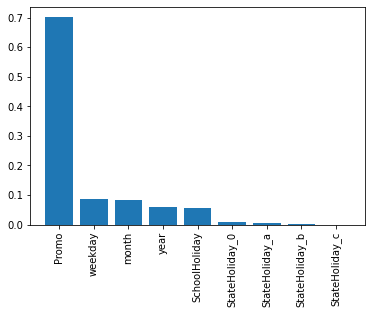

In [128]:
# 시각화
import matplotlib.pyplot as plt
plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation=90)  # x축 변수들 이름 90도 회전

Stateholiday_0 이후에 값들은 거의 영향을 주지 못한다.

In [129]:
# 크로스 벨리데이션
from sklearn.model_selection import cross_val_score

In [133]:
cross_val_score(xgb, train[input_var], train['Sales'], scoring='neg_mean_squared_error', cv=3)
            #  모델   인풋변수          타겟변수     에러점수를 책정하는 방법 neg는 -값   3개로 분
# mean_squared_error 는 낮을 수록 좋다

array([ -7440968.69232166, -10165475.69817356,  -7896996.52747543])

In [132]:
# 상위 5개만 사용
cross_val_score(xgb, train[['Promo', 'weekday', 'month', 'year', 'SchoolHoliday']], train['Sales'], scoring='neg_mean_squared_error', cv=3)

# 에러점수가 약간 줄었다.

array([ -7437417.60656606, -10109891.53781048,  -7579785.74399885])

### 그렇다면 상위 몇 개의 변수를 사용해야 모델의 성능이 향상될까?

In [134]:
import numpy as np

In [135]:
score_list = []
selected_varnum = []

In [137]:
for i in range(1,10):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb,
                             train[selected_var],
                             train['Sales'],
                             scoring='neg_mean_squared_error', cv=3)
    
    score_list.append(-np.mean(scores)) # 각 라운드를 진행했을 때 cross_val_score의 평균은 얼마인가?
                                        # 위에는 neg(네거티브)를 사용했기 때문에 한 번 더 - 를 붙여 양수로 만든다.
    selected_varnum.append(i)  # 몇개의 변수를 선택하나?
    print(i) # 프린트는 진행도를 보기 위해 적은 것

1
2
3
4
5
6
7
8
9


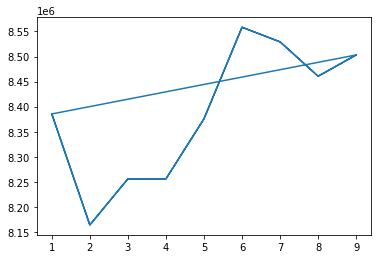

In [140]:
# 시각화
plt.plot(selected_varnum, score_list)

### mean_squared_error가 가장 낮은 지점은 상위 2개의 변수만 사용했을 때

In [141]:
# 상위 2개만 사용
cross_val_score(xgb, train[['Promo', 'weekday']], train['Sales'], scoring='neg_mean_squared_error', cv=3)

array([ -7241548.38898523, -10134534.97381444,  -7116067.92521244])

In [142]:
# 다시! 인풋변수로 활용할 데이터 지정
xgb.fit(train[['Promo', 'weekday']],
       train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=16, num_parallel_tree=1,
             random_state=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [143]:
# test 예측
test['Sales'] = xgb.predict(test[['Promo', 'weekday']])

### 다시 kaggle에 제출

In [144]:
test[['id', 'Sales']].to_csv("submission1.csv", index=False)